In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

- Calculate the more likely outcome 

- Assumptions
    - linearity 
    - multivariate normality of the residuals 
    - homoscedasticity 
    - low collinearity 

- Binary Logistic Regression formula - (what is ln btw?)
variables $X$ is: 
$$ln\left(\dfrac p{1-p}\right)=\beta X$$

- What are the odds of getting heads in flipping a fair coin? 
    - 1

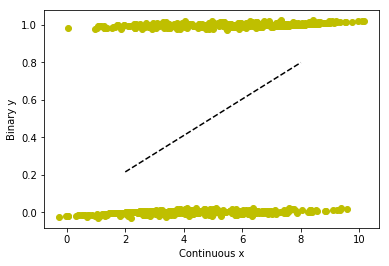

In [2]:
# Set the random seed so that the 'random' data is the same each time
# the code is run.
np.random.seed(seed=456613)

# Create some data.
df = pd.DataFrame()
for probs in list(range(2, 9)):
    tmp = pd.DataFrame({
        'y': np.random.binomial(1, probs / 10, size=(1, 100))[0],
        # 1 is the # of trial, prob/10 is the probability, size= # of datapoints 
        'x': probs
    }) 
    df = df.append(tmp)


# Continuous predictor.
x = df['x']

# Binary outcome.
bin_y = df['y']

# Calculate linear regression for x and bin_y.
fit = np.polyfit(x,bin_y,1)
# Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
# to points `(x, y)`. Returns a vector of coefficients `p` that minimises
# the squared error. 


# Work as a function to return the predicted value of y.
fit_fn = np.poly1d(fit)
# poly"one"d = A one-dimensional polynomial class. creating a function to pass onto 


# Add a little 'noise' to the data for graphing purposes.
jitter = np.random.randn(700)   # 700 because that the length of the dataset
# Return a sample (or samples) from the "standard normal" distribution.

# Display our results.
plt.plot(x + jitter, bin_y + jitter / 100, 'yo', x, fit_fn(x), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Binary y')
plt.show()

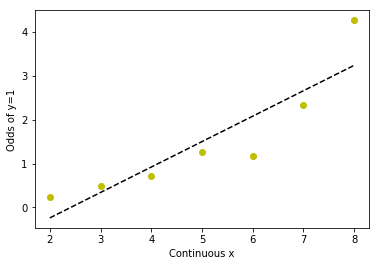

In [3]:
# Another strategy to convert the binary values into the odds of getting y=1 for each value of x
# Converting 


# Unique values in x.
xvals = x.unique()
#array([2, 3, 4, 5, 6, 7, 8])


# Calculate and store the odds.
yodds = []
for xi in xvals: 
    y1_ct = bin_y[x == xi].sum()  # The number of trials y = 1.
    # How do we know that x == xi is where y is 1, see below, it has 1 and 0
    #print(y1_ct)
    y0_ct = len(bin_y[x == xi]) - y1_ct  # The number of trials y = 0.
    #print(y0_ct)
    yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    # p / 1-p = odds

#Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, yodds, 1)

# Work as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)
#print(fit_fn)

# Display our work.
plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

In [4]:
bin_y[8]

8    0
8    0
8    1
8    1
8    0
8    0
8    0
Name: y, dtype: int64

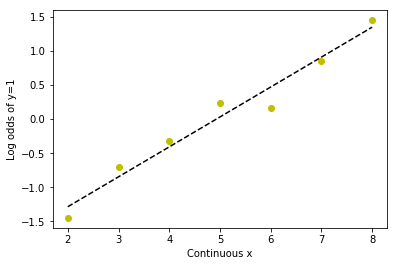

In [5]:
# Next step: Taking log of the odds 

# Natural log of the odds.
ln_yodds = np.log(yodds)

# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, ln_yodds, 1)

# Works as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display.
plt.plot(xvals, ln_yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Log odds of y=1')

plt.show()

# regression line becoming more and more linear 

## TLDS

Imagine you ran a binary logistic regression predicting likelihood of developing a hearing problem, using age in years and male (0=female, 1=male) as predictors. Your final model looks like this:

$$logit(HasHearingProblem) = -1 + .02 * age + 1 * male$$

Write out a description of the effects that age and gender have on the odds of developing hearing problems in terms a layperson could understand.  Include estimates for the odds of hearing problems in a 95 year old woman and a 50 year old man. Discuss your interpretation with your mentor.

__95 year old woman__
- $logit(HasHearingProblem) = -1 + .02 * age + 1 * male$

= $-1 + .02 * 95 + 1 * 0$

= 0.9


__50 year old man__

- $logit(HasHearingProblem) = -1 + .02 * age + 1 * male$

= $-1 + .02 * 50 + 1 * 1$

= 1

The estimated 

In [6]:
yodds
np.log(yodds)

array([-1.45001018, -0.70818506, -0.32277339,  0.24116206,  0.16034265,
        0.84729786,  1.45001018])

In [7]:
print(np.exp(.9))

print(np.exp(1))


2.45960311115695
2.718281828459045


$prob(X) = odd  / (1+ odds)$

In [8]:
np.exp(-1.123) / (1+ np.exp(-1.123))

0.24545523845987283

In [9]:
prob_w = np.exp(.9) / (1+np.exp(.9)) 
print('95 year old woman probability: ', prob_w)
print('95 year old woman odds: ', prob_w/(1-prob_w) )

95 year old woman probability:  0.710949502625004
95 year old woman odds:  2.4596031111569503


For a 95 year old woman, there is a 71% chance of developing hearing problems. The odds of developing hearing problem is 2.45

In [10]:
prob_m = np.exp(1) / (1+np.exp(1))

print('50 year old man probability: ', prob_m)

print('50 year old man odds: ', prob_m / (1-prob_m))

50 year old man probability:  0.7310585786300049
50 year old man odds:  2.7182818284590455


For a 50 year old man, there is a 73% chance of developing hearing problems. The odds of developing hearing problem is 2.71

- If you are a male, you are more likely to develop hearing problems with age, and the odds are much higher for you in comparison to a woman of similar age. 

__Useful formula to remember:__

Given p, an observed proportion or probability:
  
  - Odds = p/(1−p)

  - Log-Odds: LO 
      = log[Odds]
      = log_e[p/(1−p)]

Given the Log-Odds:  
    - Odds = exp$[LO]$

Given the Odds:  p = Odds/(1+Odds)

In [11]:
# Fitting a binary logistic model with statsmodels 

In [12]:
# Read in the data.
df = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1") 

# Take a peek.
print(df.head())


   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


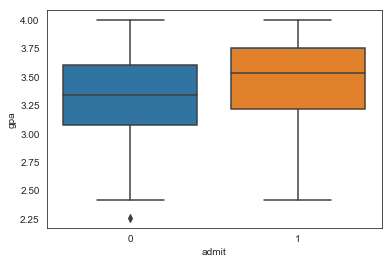

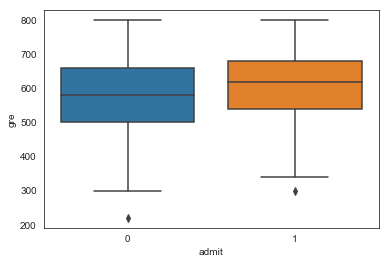

In [13]:
# Prettier plots are better.
sns.set_style("white")


# Bivariate relationships of predictors to admissions outcome.
sns.boxplot(x="admit", y="gpa", data=df)
plt.show()
sns.boxplot(x="admit", y="gre", data=df)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


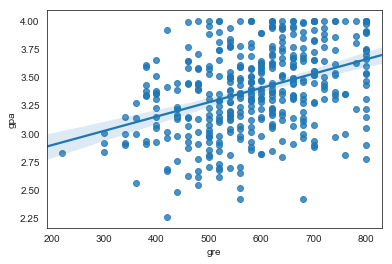

In [14]:
# Relationship between predictors.
sns.regplot(x='gre', y='gpa', data=df)
plt.show()

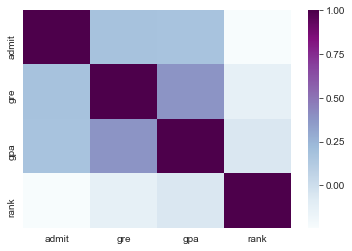

In [15]:
sns.heatmap(df.corr(), cmap='BuPu')

In [16]:
# Declare predictors.
X_statsmod = df[['gre', 'gpa']]


In [17]:
# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#X_statsmod

# Declare and fit the model.
logit = sm.Logit(df['admit'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.600430
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Fri, 21 Sep 2018   Pseudo R-squ.:                 0.03927
Time:                        07:42:02   Log-Likelihood:                -240.17
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 5.456e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0027      0.001      2.544      0.011       0.001       0.005
gpa            0.7547      0.

In [19]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)


#print(pred_statsmod)
#print(pred_y_statsmod)




In [20]:
# Accuracy table.
table = pd.crosstab(df['admit'], pred_y_statsmod)

print('\n Accuracy by admission status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by admission status
col_0    0   1
admit         
0      263  10
1      118   9

 Percentage accuracy
0.68


In [21]:
table.sum().sum()

400

In [22]:
# With Sklearn 

# includes a parameter regularization element that penalizes extremely large parameters 
# in the name of increasing predictive accuracy.

# C is set to a large number now, which decreases the effectiveness of the regularization 
# so that parameter estimates will be similar to the ones from 'statsmodels' above.

# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gpa', 'gre']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))
# why are crosstab values differ in row and columns as shown in the statsmodel? 


print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(pred_y_sklearn, y))

# Important note about confusion matrix - row0: 

Coefficients
[[0.74747563 0.00267019]]
[-4.91157158]

 Accuracy by admission status
admit    0    1
row_0          
0      263  118
1       10    9

 Percentage accuracy
0.68
Confusion Matrix:  [[263 118]
 [ 10   9]]


## Challenge: optimize the model(s)
While the two packages yield similar accuracy rates, they have very different patterns of error. Play with the models by adding additional features and shrinking the regularization coefficient to see if you can get the accuracy higher than 68%.

In [23]:
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gpa', 'gre']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)


pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))
# why are crosstab values differ in row and columns as shown in the statsmodel? 


print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(pred_y_sklearn, y))

Coefficients
coefs: [[0.74747563 0.00267019]]
intercept:  [-4.91157158]

 Accuracy by admission status
admit    0    1
row_0          
0      263  118
1       10    9

 Percentage accuracy
0.68
Confusion Matrix:  [[263 118]
 [ 10   9]]


In [24]:
LogisticRegression?

In [25]:
print(df.head())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [26]:
df['gre_by_gpa'] = df.gre/df.gpa

In [27]:
df.head()

,admit,gre,gpa,rank,gre_by_gpa
0,0,380,3.61,3,105.263158
1,1,660,3.67,3,179.836512
2,1,800,4.00,1,200.000000
3,1,640,3.19,4,200.626959
4,0,520,2.93,4,177.474403


In [28]:
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gpa', 'gre_by_gpa']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)



pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))
# why are crosstab values differ in row and columns as shown in the statsmodel? 


print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(pred_y_sklearn, y))

Coefficients
coefs: [[1.2508993  0.00969708]]
intercept:  [-6.74279705]

 Accuracy by admission status
admit    0    1
row_0          
0      263  118
1       10    9

 Percentage accuracy
0.68
Confusion Matrix:  [[263 118]
 [ 10   9]]


In [29]:
lr = LogisticRegression(C=1e9, solver='newton-cg')
y = df['admit']
X = df[['gpa', 'rank']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)



pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))
# why are crosstab values differ in row and columns as shown in the statsmodel? 


print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(pred_y_sklearn, y))

Coefficients
coefs: [[ 1.02702778 -0.58222668]]
intercept:  [-2.88259211]

 Accuracy by admission status
admit    0   1
row_0         
0      261  96
1       12  31

 Percentage accuracy
0.73
Confusion Matrix:  [[261  96]
 [ 12  31]]


In [30]:
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gre', 'rank']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)


pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))
# why are crosstab values differ in row and columns as shown in the statsmodel? 


print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(pred_y_sklearn, y))

Coefficients
coefs: [[ 0.00321442 -0.55199403]]
intercept:  [-1.36157133]

 Accuracy by admission status
admit    0    1
row_0          
0      255  101
1       18   26

 Percentage accuracy
0.7025
Confusion Matrix:  [[255 101]
 [ 18  26]]


In [31]:
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gpa', 'gre', 'rank']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)


pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))
# why are crosstab values differ in row and columns as shown in the statsmodel? 


print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(pred_y_sklearn, y))

Coefficients
coefs: [[ 0.77018647  0.00227432 -0.55871847]]
intercept:  [-3.41666441]

 Accuracy by admission status
admit    0   1
row_0         
0      253  98
1       20  29

 Percentage accuracy
0.705
Confusion Matrix:  [[253  98]
 [ 20  29]]


In [32]:
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gre_by_gpa', 'rank']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))
# why are crosstab values differ in row and columns as shown in the statsmodel? 


print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(pred_y_sklearn, y))

Coefficients
coefs: [[ 0.0048586  -0.57084614]]
intercept:  [-0.25189892]

 Accuracy by admission status
admit    0    1
row_0          
0      256  108
1       17   19

 Percentage accuracy
0.6875
Confusion Matrix:  [[256 108]
 [ 17  19]]


In [33]:
df.head()

,admit,gre,gpa,rank,gre_by_gpa
0,0,380,3.61,3,105.263158
1,1,660,3.67,3,179.836512
2,1,800,4.00,1,200.000000
3,1,640,3.19,4,200.626959
4,0,520,2.93,4,177.474403


In [34]:
df['rank_gpa'] = df['rank'] * df['gpa']

In [35]:
df.head()

,admit,gre,gpa,rank,gre_by_gpa,rank_gpa
0,0,380,3.61,3,105.263158,10.83
1,1,660,3.67,3,179.836512,11.01
2,1,800,4.00,1,200.000000,4.00
3,1,640,3.19,4,200.626959,12.76
4,0,520,2.93,4,177.474403,11.72


In [36]:
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gre', 'rank_gpa']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))
# why are crosstab values differ in row and columns as shown in the statsmodel? 


print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(pred_y_sklearn, y))

Coefficients
coefs: [[ 0.00364348 -0.13111456]]
intercept:  [-1.8674918]

 Accuracy by admission status
admit    0    1
row_0          
0      257  108
1       16   19

 Percentage accuracy
0.69
Confusion Matrix:  [[257 108]
 [ 16  19]]


In [37]:
df['rank_gpa'] = df['gpa'] / df['rank']

In [38]:
df.head()

,admit,gre,gpa,rank,gre_by_gpa,rank_gpa
0,0,380,3.61,3,105.263158,1.203333
1,1,660,3.67,3,179.836512,1.223333
2,1,800,4.00,1,200.000000,4.000000
3,1,640,3.19,4,200.626959,0.797500
4,0,520,2.93,4,177.474403,0.732500


In [39]:
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gre', 'rank_gpa']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))
# why are crosstab values differ in row and columns as shown in the statsmodel? 


print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(pred_y_sklearn, y))

Coefficients
coefs: [[0.00275331 0.60852139]]
intercept:  [-3.44271756]

 Accuracy by admission status
admit    0   1
row_0         
0      256  99
1       17  28

 Percentage accuracy
0.71
Confusion Matrix:  [[256  99]
 [ 17  28]]


In [40]:
df['rank_sqr'] = df['rank']**2

In [41]:
df.head()

,admit,gre,gpa,rank,gre_by_gpa,rank_gpa,rank_sqr
0,0,380,3.61,3,105.263158,1.203333,9
1,1,660,3.67,3,179.836512,1.223333,9
2,1,800,4.00,1,200.000000,4.000000,1
3,1,640,3.19,4,200.626959,0.797500,16
4,0,520,2.93,4,177.474403,0.732500,16


In [42]:
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gre', 'rank_sqr']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))
# why are crosstab values differ in row and columns as shown in the statsmodel? 


print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(pred_y_sklearn, y))

Coefficients
coefs: [[ 0.00317711 -0.10586177]]
intercept:  [-1.96387346]

 Accuracy by admission status
admit    0    1
row_0          
0      257  107
1       16   20

 Percentage accuracy
0.6925
Confusion Matrix:  [[257 107]
 [ 16  20]]
